In [2]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [5]:
# 0 or 1 のステップ関数なので int に変換してる
y.astype(np.int)

array([0, 1, 1])

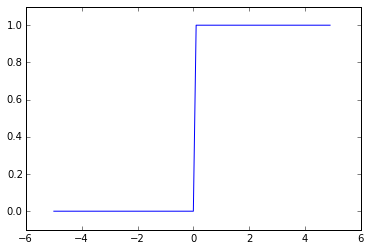

In [6]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1) # -5.0, -4.9 ... 4.9, 5.0
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y軸の範囲を指定
plt.show()

In [7]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [9]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[ 2.  3.  4.]
[ 1.          0.5         0.33333333]


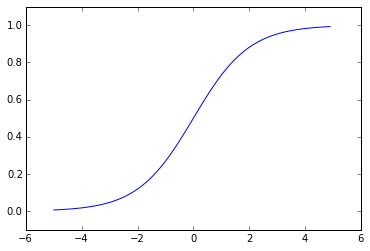

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
def relu(x):
    return np.maximum(0, x)

In [12]:
# 多次元配列
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [13]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [19]:
# 内積（dot積）
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
print(A.shape)
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [21]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
print(np.dot(A,B))

[[22 28]
 [49 64]]


In [24]:
# 要素数が合わないときのエラー
A = np.array([[1,2], [4,5]])
B = np.array([[1,2], [3,4], [5,6]])
print(np.dot(A,B))

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [28]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([1, 2])
print(np.dot(A, B))

[ 5 11 17]


In [34]:
# フォワード方向の実装
# 第1層
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(np.dot(X, W1))
A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

[ 0.2  0.5  0.8]
[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [42]:
# 第2層
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


In [44]:
# 第3層
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = A3
print(Y)

[ 0.31682708  0.69627909]


In [45]:
# 出力層
# 分類問題 ソフトマックス関数
# 回帰問題 恒等関数

In [49]:
# ソフトマックス関数
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]
